## Trying out Jupyter Notebooks with basic relevant Python

Let's get acquainted with interactive Python Jupyter Notebooks (ipynb), our main working tools throughout the course.

First of all, in an `ipynb` file we distinguish:

- text chunks: where we write instructions, comments, explanations (like this one!)
- code chunks: where we write Python instructions to be executed

As for `Python`, we will mainly use three fundamental libraries:

1. `numpy`: to work with arrays (vectors, matrices)
2. `pandas`: to work with dataframes (reading and manipulating datasets)
3. `matplotlib`: to visualize data and results (making plots)

In addition, we'll use `Keras` for deep learning: we'll see more on this later.

This is not a course on Python, not even an introduction: just a few notes to get some basic acquaintance with these libraries.

### Numpy

We start by importing the library and creating a vector (one-dimensional array)

In [ ]:
## import libraries
import numpy as np

arr_1d = np.array([1, 2, 3, 4, 5, 0, 7, 1, 9])
print(arr_1d)

[1 2 3 4 5 0 7 1 9]


We can use the array attribute `shape` to get the dimensions of the array

In [ ]:
arr_1d.shape

(9,)

We see that by default `numpy` does not specify the second dimension for one-dimensional arrays (vectors). If you want to make this explicit (which may turn out to be helpful for some array operations and to avoid ambiguous results), you can use the **function** `reshape()`:

In [ ]:
arr_1d = arr_1d.reshape(len(arr_1d),1)
print(arr_1d.shape)

(5, 1)


We can also build arrays with more dimensions (matrices, "tensors"): in deep learning, mastering the dimensions of tensors (multidimensional arrays) is very important!

In [ ]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(arr_2d)
print(arr_2d.shape) ## 2 rows, 3 columns

[[1 2 3]
 [4 5 6]]
(2, 3)


In [ ]:
arr_3d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(arr_3d)
print(arr_3d.shape) ## 2 layers, 2 row, 3 columns

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
(2, 2, 3)


In [ ]:
value = arr_3d[0,1,2] ## get first layer, second row, third element (indexing in Python starts at 0!)
print(value)

6


- use array indices for slicing: `[start:end]`
- a step argument can be added: `[start:end:step]`

In [ ]:
print(arr_1d[:]) ## entire array
print(arr_1d[3:6]) ## elements 4, 5 and 6 of the array
print(arr_1d[:3]) ## first three elements of the array --> equivalent to arr_1d[0:3] 
print(arr_1d[7:]) ## last two elements of the array --> equivalent to arr_1d[7:len(arr_1d)] 

[1 2 3 4 5 0 7 1 9]
[4 5 0]
[1 2 3]
[1 9]


### Pandas

Python library to work with tabular data (multidimensional), in the form of mainly **dataframes**.

We load the library and create a first dataframe:

In [ ]:
import pandas as pd

df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.359287,-0.023851,-1.330552,-0.448295
1,-0.312321,-0.139350,0.699210,0.113655
2,-1.735257,-0.806734,0.191943,0.992746
3,-0.357516,1.189048,0.405285,-0.185171
4,-0.678332,0.542022,-0.413859,0.700269
5,-0.479809,-1.671045,1.407185,0.873747
6,-0.214179,-0.946423,-1.447137,-1.320725
7,0.447397,-1.609178,1.239268,0.222003


With the dataframe attribute `dtypes` we can get the data type of each column in a Pandas dataframe:

In [ ]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

The Pandas function `head()` will show the first few rows of the dataframe; the attribute `columns` returns the column names.

In [ ]:
df.head()

          A         B         C         D
0  0.359287 -0.023851 -1.330552 -0.448295
1 -0.312321 -0.139350  0.699210  0.113655
2 -1.735257 -0.806734  0.191943  0.992746
3 -0.357516  1.189048  0.405285 -0.185171
4 -0.678332  0.542022 -0.413859  0.700269
Index(['A', 'B', 'C', 'D'], dtype='object')


In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

With the function `to_numpy()` we convert a dataframe to an array; then we can slice it as we already saw for numpy arrays

In [ ]:
arr = df.to_numpy()
arr

array([[ 0.35928742, -0.02385115, -1.33055204, -0.44829505],
       [-0.31232065, -0.13935046,  0.69921035,  0.11365486],
       [-1.73525698, -0.80673445,  0.19194324,  0.9927458 ],
       [-0.35751557,  1.18904782,  0.40528481, -0.18517081],
       [-0.67833206,  0.54202179, -0.41385899,  0.70026934],
       [-0.47980944, -1.67104493,  1.40718456,  0.87374718],
       [-0.21417949, -0.94642324, -1.44713742, -1.32072519],
       [ 0.44739686, -1.60917769,  1.23926794,  0.22200288]])

In [ ]:
arr[:,1] ## get second column

array([-0.02385115, -0.13935046, -0.80673445,  1.18904782,  0.54202179,
       -1.67104493, -0.94642324, -1.60917769])

You can also slice directly the Pandas dataframe:

1. by column name

In [ ]:
df['A']

0    0.359287
1   -0.312321
2   -1.735257
3   -0.357516
4   -0.678332
5   -0.479809
6   -0.214179
7    0.447397
Name: A, dtype: float64

2. by slicing by rows

In [ ]:
df[0:2]

,A,B,C,D
0,0.359287,-0.023851,-1.330552,-0.448295
1,-0.312321,-0.139350,0.699210,0.113655


3. by row and/or column names using the `.loc` syntax

In [ ]:
print(df.loc[df.index.values[0]])
df.loc[:, ['B','C']]

A    0.359287
B   -0.023851
C   -1.330552
D   -0.448295
Name: 0, dtype: float64


,B,C
0,-0.023851,-1.330552
1,-0.139350,0.699210
2,-0.806734,0.191943
3,1.189048,0.405285
4,0.542022,-0.413859
5,-1.671045,1.407185
6,-0.946423,-1.447137
7,-1.609178,1.239268


4. by position using the `.iloc` syntax

In [ ]:
df.iloc[0:2,2:4]

,C,D
0,-1.330552,-0.448295
1,0.699210,0.113655


### Matplotlib

`matplotlib` is a versatile Python library for data visualization which allows you to produce a very large variety of high-quality plots.
We import the module `pyplot` from the library and produce a first basic plot:

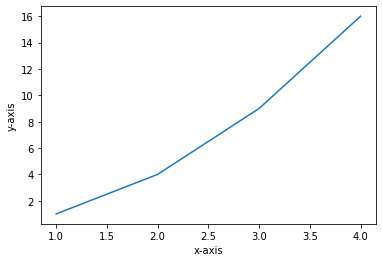

In [ ]:
from matplotlib import pyplot as plt

x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y)
plt.show() ## not strictly necessary in interactive mode (as ipython or jupyter notebooks)

Instead of a diagram (line plot), we can also make a **scatter plot**:

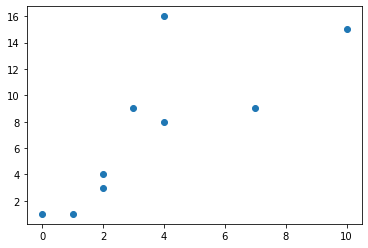

In [ ]:
x = np.array([1, 2, 3, 4, 0, 2, 7, 4, 10])
y = np.array([1, 4, 9, 16, 1, 3, 9, 8, 15])
plt.scatter(x,y)

For categorical data, a **barplot** can be used:

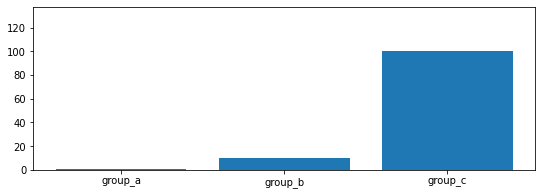

In [ ]:
names = ['A', 'B', 'c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.plot(131)
plt.bar(names, values)
plt.show()

We can plot a distribution from synthetic data using a **histogram**:

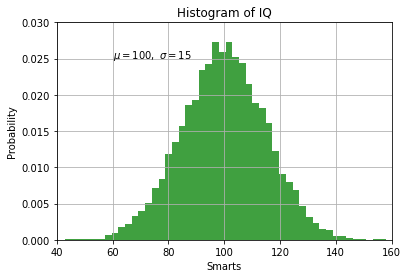

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

You can also plot directly from a Pandas dataframe:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.469862,0.998139,0.407275,0.562368
1,1.047108,0.957911,-0.226863,0.570052
2,0.913268,0.433490,-1.330140,1.122814
3,-0.430175,2.117058,0.113668,-0.425308
4,0.627775,-0.200103,1.349896,0.422068
...,...,...,...,...
995,0.334473,1.070433,-2.735368,-0.467803
996,0.300779,-1.486400,-1.275902,0.851674
997,-0.072443,-1.122409,0.366602,-0.127017
998,-1.039797,1.255963,0.102248,-0.884400


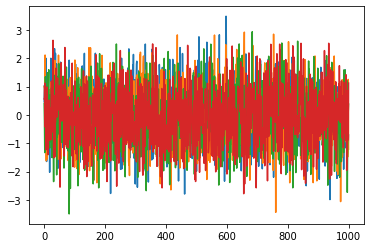

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
df = df.cumsum() ## cumulative sums per columns
df

,A,B,C,D
0,0.469862,0.998139,0.407275,0.562368
1,1.516970,1.956050,0.180412,1.132420
2,2.430238,2.389540,-1.149727,2.255234
3,2.000063,4.506598,-1.036060,1.829926
4,2.627837,4.306495,0.313836,2.251993
...,...,...,...,...
995,1.313548,-45.720550,-44.627769,-57.271024
996,1.614327,-47.206949,-45.903671,-56.419350
997,1.541884,-48.329358,-45.537069,-56.546367
998,0.502087,-47.073395,-45.434821,-57.430767


<Figure size 432x288 with 0 Axes>

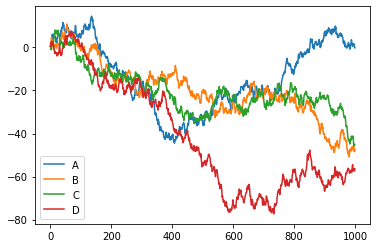

In [ ]:
plt.figure()
df.plot()

In Pandas, plot functions can be called directly on dataframes, e.g. using the function `plot.bar()` (we saw an example earlier with `df.plot()`)

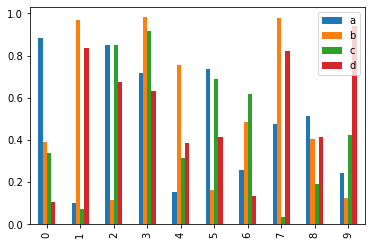

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

## Exercise 0.1

Now it is your turn to put together what you just learnt:

1. create a numpy array or a pandas dataframe (or a combination of both)
2. plot the data

In [ ]:
## your code here